In [22]:
from pathlib import Path 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [23]:
folder = Path('./params/N4')
for f in folder.iterdir():
    print(f.name.split('C')[-1].rstrip('.dat'))

0.5
0.1
0.3
0.08
0.0
0.7
0.01
0.05
1.0


In [24]:
C_list = []
percent_seg = []
percent_alt = []
eff = []
ineq = []
eff_er = []
ineq_er = []
for f in folder.iterdir():
    C = f.name.split('C')[-1].rstrip('.dat')
    df = pd.read_table(f, sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
    C_list.append(C)
    
    mx = df['inequality'].max()
    mn = 0.95*mx
    df_seg = df[(df['inequality']>mn) & (df['emax_perc']>0.95)]
    percent_seg.append(df_seg.shape[0]/df.shape[0])

    mn = 0.05*mx
    df_alt = df[(df['inequality']<mn) & (df['emax_perc']>0.95)]
    percent_alt.append(df_alt.shape[0]/df.shape[0])

    eff.append(df['efficiency'].mean())
    ineq.append(df['inequality'].mean())
    eff_er.append(df['efficiency'].std())
    ineq_er.append(df['inequality'].std())

df_c = pd.DataFrame({'c':C_list, '%seg':percent_seg, '%alt':percent_alt, 'eff':eff, 'ineq':ineq, 'eff_er':eff_er, 'ineq_er':ineq_er})
df_c.c.astype('float')
df_c.sort_values(by='c',inplace=True)
df_c.head()

,c,%seg,%alt,eff,ineq,eff_er,ineq_er
4,0.0,0.0,0.0,0.231739,0.207558,0.173380,0.173015
6,0.01,0.0,0.0,0.409676,0.182202,0.049025,0.124914
7,0.05,0.0,0.0,0.436506,0.168141,0.031713,0.113968
3,0.08,0.0,0.0,0.444340,0.155506,0.027262,0.111143
1,0.1,0.0,0.0,0.447229,0.157513,0.025126,0.112964


In [25]:
df_c['c'].iloc[df_c['eff'].argmax()]

'0.1'

<Axes: xlabel='c', ylabel='%'>

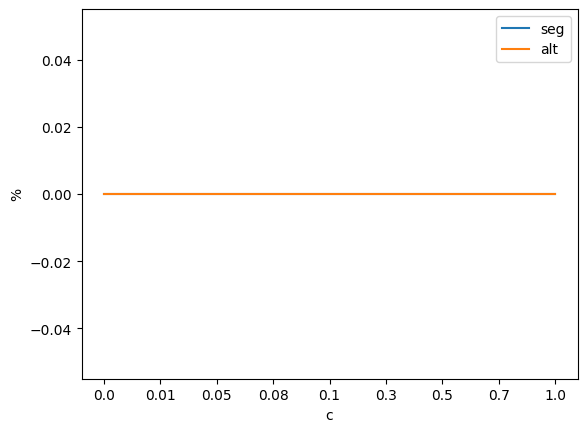

In [26]:
ax = sns.lineplot(x='c',y='%seg',data=df_c,label='seg')
ax.set_ylabel('%')
sns.lineplot(x='c',y='%alt',data=df_c,label='alt')

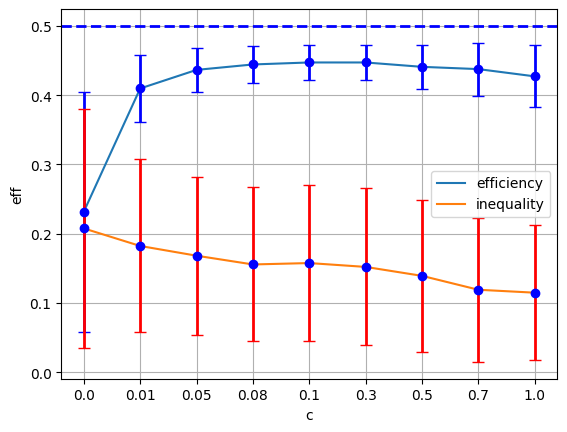

In [27]:
ax = sns.lineplot(x='c',y='eff',data=df_c, label='efficiency')
ax.axhline(y=0.5, color='blue', linestyle='--', linewidth=2)
plt.errorbar(x=df_c['c'], y=df_c['eff'], yerr=df_c["eff_er"], fmt='o', color='blue', ecolor='b', elinewidth=2, capsize=4)
sns.lineplot(x='c',y='ineq',data=df_c, label='inequality')
plt.errorbar(x=df_c['c'], y=df_c['ineq'], yerr=df_c["ineq_er"], fmt='o', color='blue', ecolor='r', elinewidth=2, capsize=4)
plt.grid()